# Dataset Cleaning and Analysis

In [9]:
import pandas as pd 
import numpy as np
import sklearn as sk
import os
import sys
import matplotlib.pyplot as plt

In [10]:
project_root = os.path.dirname(os.path.dirname(os.getcwd()))
dataset_path = os.path.join(project_root, 'data_collection', 'dataset.csv')
df = pd.read_csv(dataset_path, encoding='utf-8-sig')

df.head()


,Brand,Name,Description,Notes,Concepts
0,Costume National,SEA THRU,"In Sea Thru, natural and molecular notes merge...","['Sea Water', 'Lemon', 'Oakmoss', 'Cypress', '...","['Dynamic', 'Sporty', 'Summer', 'Everyday', 'C..."
1,Gritti,HYSTERICA,"Hysterica, a life explosion, tailored for thos...","['Tuberose', 'Liquor', 'Plum', 'Gardenia', 'Pa...","['Everyday', 'Floral', 'Blooming', 'Round', 'R..."
2,4711,ORRIS & SILK,A warm and floral scent with the powdery opule...,"['Iris', 'Orris', 'Silk Tree Blossom. Discover...","['Everyday', 'Casual', 'Day', 'Romantic', 'Whi..."
3,Lomani,MADEMOISELLE,Mademoiselle is the portrait of an independent...,"['Jasmine', 'Vanilla (Madagascar)', 'Red Berri...","['Round', 'Everyday', 'Rich', 'Intense', 'Robu..."
4,Lomani,ELIXIR PERFECT,An elixir that brings unconditional cheerfulne...,"['Narcissus', 'Cashmeran (Woody musky)', 'Almo...","['Everyday', 'Round', 'Rich', 'Casual', 'Inten..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13575 entries, 0 to 13574
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        13575 non-null  object
 1   Name         13575 non-null  object
 2   Description  13571 non-null  object
 3   Notes        13575 non-null  object
 4   Concepts     13575 non-null  object
dtypes: object(5)
memory usage: 530.4+ KB


In [12]:
df.describe()

,Brand,Name,Description,Notes,Concepts
count,13575,13575,13571,13575,13575
unique,1114,13180,13390,13432,3655
top,Avon,OUD,"Elegantly blended, this composition of traditi...","['Oud', 'Agarwood. Discover more details!']","['Everyday', 'Floral', 'Blooming', 'Round', 'R..."
freq,347,14,11,7,275


## Dataset Cleaning

In [13]:
df['Notes'] = df['Notes'].str.replace('Discover more details!', '', regex=False)
df['Notes'].value_counts()

Notes
['Oud', 'Agarwood. ']                                                                                                                                                       7
['Bitter Orange', 'Cashmeran (Woody musky)', 'Metallic Notes', 'Lime', 'Coriander', 'Jasmine', 'Pittosporum', 'Aldehyde', 'Amber', 'Musk. ']                                6
['Rose. ']                                                                                                                                                                  5
['Lily Of The Valley. ']                                                                                                                                                    5
['Vanilla. ']                                                                                                                                                               4
                                                                                                                            

In [14]:
# Save the updated dataframe to a new CSV file
updated_dataset_path = os.path.join(project_root, 'data_collection', 'updated_dataset.csv')
df.to_csv(updated_dataset_path, index=False, encoding='utf-8-sig')

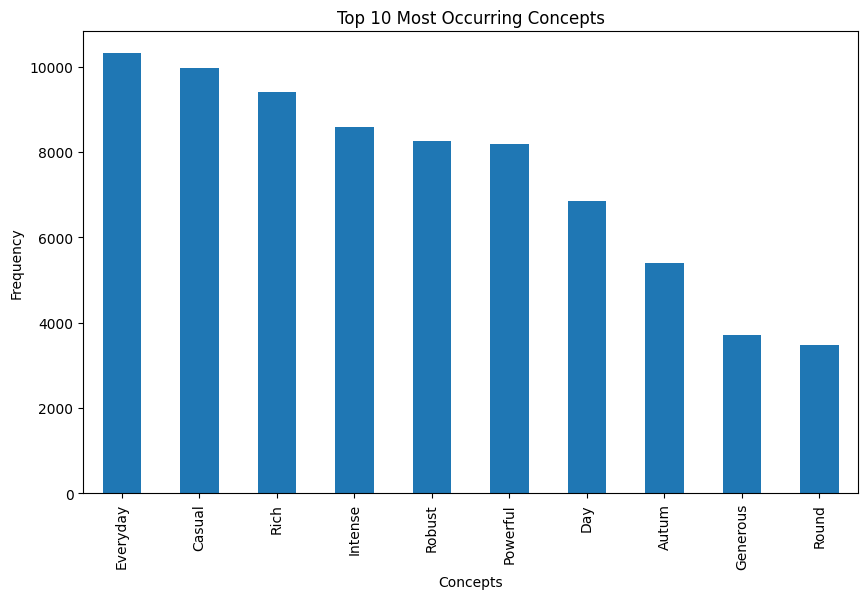

In [15]:
# Split the concepts into individual items
concepts_series = df['Concepts'].apply(lambda x: pd.Series(x.strip("[]").replace("'", "").split(", "))).stack().reset_index(drop=True)
# Count the occurrences of each concept
concept_counts = concepts_series.value_counts().head(10)
# Plot the most occurring concepts
plt.figure(figsize=(10, 6))
concept_counts.plot(kind='bar')
plt.title('Top 10 Most Occurring Concepts')
plt.xlabel('Concepts')
plt.ylabel('Frequency')
plt.show()

In [16]:
num_unique_concepts = concepts_series.nunique()
print(num_unique_concepts)

282


In [ ]:
# Count the occurrences of each brand
brand_counts = df['Brand'].value_counts()

# Filter the top 30 brands
top_100_brands = brand_counts.head(30)

# Plot the distribution of the top 100 brands
plt.figure(figsize=(12, 8))
top_100_brands.plot(kind='bar')
plt.title('Distribution of Top 30 Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.show()
plt.show()